In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Load and preprocess image data
def load_data(data_dir, img_size):
    categories = os.listdir(data_dir)
    data = []
    labels = []

    for category in categories:
        category_path = os.path.join(data_dir, category)
        class_num = categories.index(category)  # Label encoding
        for img_file in os.listdir(category_path):
            try:
                img_path = os.path.join(category_path, img_file)
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_size, img_size))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                data.append(img_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image: {img_file}, {e}")

    return np.array(data), np.array(labels)

In [ ]:
# Configuration
DATA_DIR = "/content/drive/MyDrive/Data_Sets/Psoraisis_data/Psorasis_Severity"  # Path to your dataset
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 30
MODEL_SAVE_PATH = "/content/drive/MyDrive/psoriasis_severity_cnn_model.h5"  # Path to save the trained model


In [ ]:

# Load dataset
data, labels = load_data(DATA_DIR, IMG_SIZE)
data = data / 255.0  # Normalize image data to [0, 1]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)



In [ ]:
# Augmentation for training data
train_datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

In [ ]:
# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(os.listdir(DATA_DIR)), activation='softmax')  # Output layer with 3 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=EPOCHS, validation_data=(X_test, y_test))


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.4157 - loss: 1.0426 - val_accuracy: 0.5167 - val_loss: 1.0133
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.5107 - loss: 1.0026 - val_accuracy: 0.5667 - val_loss: 0.9855
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.4918 - loss: 0.9893 - val_accuracy: 0.5667 - val_loss: 0.9472
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.4701 - loss: 0.9895 - val_accuracy: 0.6000 - val_loss: 0.9517
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6043 - loss: 0.9106 - val_accuracy: 0.5167 - val_loss: 0.9912
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.6450 - loss: 0.8460 - val_accuracy: 0.5333 - val_loss: 1.0329
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6354 - loss: 0.8158 - val_accuracy: 0.5333 - val_loss: 0.9693
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.4072 - loss: 1.0694 - val_accuracy: 0.4000 - val_loss: 1.0769
Epoch 9/

In [ ]:
# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


<Figure size 800x800 with 0 Axes>

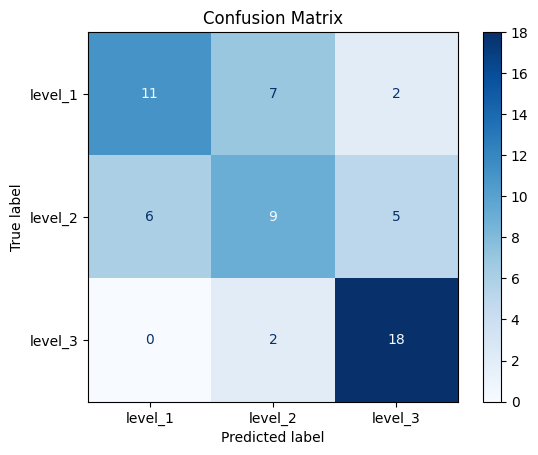

Classification Report:
               precision    recall  f1-score   support

     level_1       0.65      0.55      0.59        20
     level_2       0.50      0.45      0.47        20
     level_3       0.72      0.90      0.80        20

    accuracy                           0.63        60
   macro avg       0.62      0.63      0.62        60
weighted avg       0.62      0.63      0.62        60



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# Classification metrics
report = classification_report(y_test, y_pred, target_names=os.listdir(DATA_DIR))
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 8))
# The `display_labels` parameter is used instead of `target_names`
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=os.listdir(DATA_DIR))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", report)
#print("Confusion Matrix:\n", conf_matrix)

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

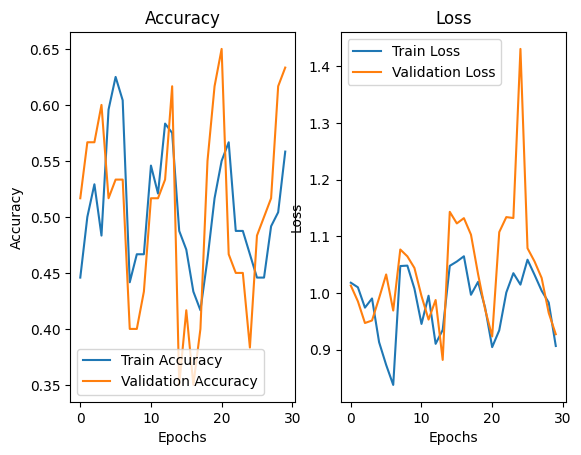

In [ ]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Save the model
model.save(MODEL_SAVE_PATH)
print(f"Model saved to {MODEL_SAVE_PATH}")

Model saved to /content/drive/MyDrive/psoriasis_severity_cnn_model.h5
